## First Exploration



In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
PATH_DATA = '../data/'

In [3]:
%matplotlib inline

## Get Data

In [4]:
df = pd.read_csv(PATH_DATA+'train.csv',delimiter='|')

In [12]:
type(df['job_title'].tolist())

list

In [9]:
er = df.job_benefits.str.lower()
df['is_assur'] = er.str.contains('asuransi')

In [10]:
df.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,is_assur
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN,False
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN,False
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN,NaN


In [9]:
df.columns

Index(['id', 'job_title', 'location', 'salary_currency', 'career_level',
       'experience_level', 'education_level', 'employment_type',
       'job_function', 'job_benefits', 'company_process_time', 'company_size',
       'company_industry', 'job_description', 'salary'],
      dtype='object')

In [11]:
df.isnull().sum()

id                          0
job_title                   0
location                    0
salary_currency             3
career_level                0
experience_level         4771
education_level             0
employment_type          1494
job_function                0
job_benefits             7299
company_process_time    10057
company_size             5644
company_industry         1659
job_description             2
salary                  27783
dtype: int64

In [15]:
len(df) - 27783

6896

In [18]:
df2 = df[~(df.salary.isnull())].reset_index(drop = True)
del df2['id']

df2.sample(10)

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5284,Regional Project Support,Makassar,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,Sarjana (S1),Penuh Waktu,"Bangunan/Konstruksi,Teknik Sipil/Konstruksi Ba...","Asuransi kesehatan;Waktu regular, Senin - Juma...",29 days,501 - 1000 pekerja,Telekomunikasi,·Membuat perencanaan dan eksekusi rencana kerj...,11500000.0
6825,ADMIN RESELLER PRODUK BABY,Jakarta Barat,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Kontrak,"Penjualan / Pemasaran,Digital Marketing","Kasual (contoh: Kaos);BPJS, etc.;Senin - Sabtu",12 days,1- 50 pekerja,Retail/Merchandise,Kami merupakan Perusahaan yang bergerang di bi...,5250000.0
4598,Field Collection,Bengkulu,IDR,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,NaN,"SMA, SMU/SMK/STM",Kontrak,"Akuntansi / Keuangan,Perbankan / Jasa Finansial",Asuransi Gigi;Asuransi kesehatan;Pinjaman;Olah...,16 days,Lebih dari 5000 pekerja,Perbankan/Pelayanan Keuangan,Deskripsi Pekerjaan Melakukan kunjungan langsu...,3000000.0
5286,Sales Manager,Banten,IDR,Manajer/Asisten Manajer,3 tahun,Tidak terspesifikasi,Kontrak,"Lainnya,Lainnya/Kategori tidak tersedia",NaN,21 days,51 - 200 pekerja,Hotel/Pariwisata,Kualifikasi :Pendidikan S1 Ilmu KomunikasiMemp...,12000000.0
2027,Head of ERP Project Managers,Jakarta Raya,IDR,Manajer/Asisten Manajer,3 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",21 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",About UsPort Cities has been awarded the Best ...,30000000.0
948,Counsellor (Sales Marketing),Jakarta Raya,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Telesales/Telemarketing",Asuransi kesehatan;Bisnis (contoh: Kemeja),NaN,1- 50 pekerja,Pendidikan,Job Responsibities :Advise and assist clients ...,8250000.0
5903,Finance Manager,Jakarta Raya,IDR,Manajer/Asisten Manajer,10 tahun,Tidak terspesifikasi,Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",NaN,28 days,2001 - 5000 pekerja,Pertambangan,"Location: Jakarta/Sulawesi Tengah, more time b...",36000000.0
632,Purchasing Staff (Hasil Laut),Maros,IDR,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,3 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material","Waktu regular, Senin - Jumat",NaN,1- 50 pekerja,Umum & Grosir,"Apabila diperlukan sewaktu-waktu, tidak kebera...",4250000.0
1804,Maintenance Staff,Cikarang,IDR,Pegawai (non-manajemen & non-supervisor),5 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,Manufaktur/Produksi,POSITION OBJECTIVES :To collaboratively work a...,6500000.0
5487,Software Quality Assurance Engineer (Software QA),Bandung,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Tidak terspesifikasi,Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Asuransi kesehatan;Waktu regular, Senin - Juma...",NaN,51 - 200 pekerja,Komputer/Teknik Informatika (Perangkat Lunak),​Job Description:Location: BANDUNG & not remot...,7750000.0


<AxesSubplot:>

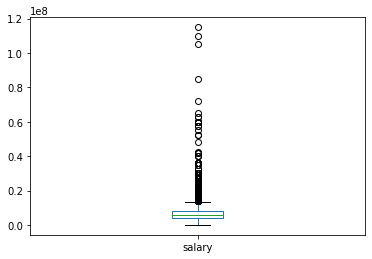

In [21]:
df2.salary.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

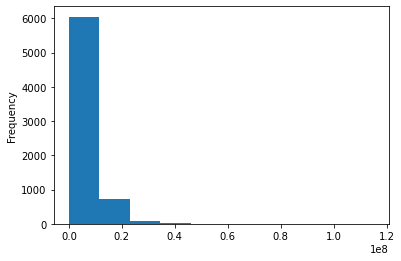

In [22]:
df2.salary.plot(kind = 'hist')

In [23]:
df2.salary.describe()

count    6.896000e+03
mean     7.061586e+06
std      5.747981e+06
min      1.000000e+01
25%      4.250000e+06
50%      5.500000e+06
75%      8.000000e+06
max      1.150000e+08
Name: salary, dtype: float64

In [32]:
df2[df2.salary<2000]

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,desc_len
31,Digital and Social Media Executive (Travel & L...,Jakarta Pusat,USD,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing","Waktu regular, Senin - Jumat",29 days,1- 50 pekerja,Periklanan/Marketing/Promosi/Hubungan Masyarakat,DIGITAL / SOCIAL MEDIA EXECUTIVEWe are recruit...,665.0,388
1038,Freelance Senior Programmer Aplikasi Pendidikan,Jakarta Raya,IDR,Manajer/Asisten Manajer,4 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Paruh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Asuransi Gigi;Tunjangan Pendidikan;Asuransi ke...,NaN,201 - 500 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",Deskripsi Pekerjaan:Sebuah perusahaan yang sed...,10.0,186
4762,Project Specialist,Sleman,IDR,Supervisor/Koordinator,1 tahun,Tidak terspesifikasi,Paruh Waktu,"Seni/Media/Komunikasi,Periklanan","Kasual (contoh: Kaos);Team bonding event, flex...",NaN,1- 50 pekerja,Periklanan/Marketing/Promosi/Hubungan Masyarakat,Job DescriptionMembuat draft visual awal untuk...,10.0,86
5949,Freelance Senior Programmer Aplikasi Pendidikan,Jakarta Raya,IDR,Manajer/Asisten Manajer,4 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Paruh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Asuransi Gigi;Tunjangan Pendidikan;Asuransi ke...,NaN,201 - 500 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",Deskripsi Pekerjaan:Sebuah perusahaan yang sed...,10.0,186


In [33]:
df2[df2.salary_currency!='IDR']

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,desc_len
31,Digital and Social Media Executive (Travel & L...,Jakarta Pusat,USD,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing","Waktu regular, Senin - Jumat",29 days,1- 50 pekerja,Periklanan/Marketing/Promosi/Hubungan Masyarakat,DIGITAL / SOCIAL MEDIA EXECUTIVEWe are recruit...,665.0,388


In [67]:
df2['salary_base'] = np.where(df2.salary_currency!='IDR', df2.salary*15000, df2.salary)
df3 = df2[(df2.salary_base>=2000000)].reset_index(drop=True)

In [68]:
df3.shape

(6840, 16)

## Feature engineering

* experience level
* career level

In [69]:
# df2['desc_len'] = df3.job_description.apply(lambda x : len(x.split(' ')))

In [70]:
df3.groupby(['experience_level']).size()

experience_level
1 tahun     2218
10 tahun      58
11 tahun       2
12 tahun       6
15 tahun       9
17 tahun       1
2 tahun     1907
20 tahun       2
3 tahun     1208
4 tahun      128
5 tahun      651
6 tahun       18
7 tahun       36
8 tahun       35
dtype: int64

In [71]:
df3['experience_level2'] = df3['experience_level'].fillna('1 tahun')
df3['f1'] = df3['experience_level2'].apply(lambda x : x.split(' ')[0]).astype(int)

In [72]:
df3.career_level.unique()

array(['Supervisor/Koordinator',
       'Pegawai (non-manajemen & non-supervisor)',
       'Manajer/Asisten Manajer',
       'Lulusan baru/Pengalaman kerja kurang dari 1 tahun',
       'CEO/GM/Direktur/Manajer Senior'], dtype=object)

In [73]:
le = LabelEncoder()
le.fit(df3.career_level)

LabelEncoder()

In [74]:
df3['f2'] = le.transform(df3.career_level)

In [75]:
df3[['f1','f2','salary_base']]

,f1,f2,salary_base
0,1,4,10500000.0
1,3,4,8000000.0
2,1,3,4750000.0
3,2,3,5250000.0
4,2,2,15000000.0
...,...,...,...
6835,2,3,6000000.0
6836,5,0,12500000.0
6837,1,3,4200000.0
6838,2,3,4500000.0


In [76]:
enc = OneHotEncoder()
enc.fit(df3[['f2']])

OneHotEncoder()

In [79]:
new_cols = ['f2_'+ str(i) for i in range(5)]
df_onehot = pd.DataFrame(enc.transform(df3[['f2']]).toarray(), columns=new_cols)
df1 = pd.concat([df3[['f1','salary_base']], df_onehot], axis = 1)

In [82]:
X = df1[['f1']+new_cols]
y = df1['salary_base']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
model1 = LinearRegression()

In [90]:
model1.fit(X_train,y_train)

LinearRegression()

In [92]:
model1.predict(X_test)

array([ 5883904., 14064768.,  4601984., ...,  4601984., 14064768.,
        9729408.])

In [96]:
np.sqrt(mean_squared_error(y_test,model1.predict(X_test)))

4528745.598792697

In [98]:
df1[['f1','salary_base']].corr()

,f1,salary_base
f1,1.000000,0.569784
salary_base,0.569784,1.000000
